In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# Import Data
adata = sc.read_h5ad('/home/glennrdx/Documents/Research_Project/processed_h5ad/crypt_enriched.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 27419 × 17573
    obs: 'Sample', 'Diet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden', '_scvi_batch', '_scvi_labels', 'published_annotations', 'EEC_refined_1', 'EEC_refined_final', 'final_annotations', 'major_cell_types'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Diet_colors', 'Sample_colors', 'final_annotations', 'final_annotations_colors', 'major_cell_types_colors', 'neighbors', 'published_annotations_colors'

In [5]:
def plot_gene_heatmap_umap(adata, genes, size = 30):
    """
    Plot heatmap UMAPs for a list of genes in an AnnData object.

    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing the single-cell data.
    genes : list
        A list of gene names to plot.

    Returns:
    --------
    None. The function displays the plots.
    """
    num_genes = len(genes)
    fig, axes = plt.subplots(1, num_genes, figsize=(6*num_genes, 6))
    
    if num_genes == 1:
        axes = [axes]
    
    for ax, gene in zip(axes, genes):
        sc.pl.umap(
            adata,
            color=gene,
            title=f'UMAP Heatmap - {gene}',
            frameon=False,
            ax=ax,
            size=size,
            color_map='viridis',
            show=False
        )
        
        ax.set_facecolor('black')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_gene_heatmap_umap(adata, ['Gene1', 'Gene2', 'Gene3'])

In [6]:
def plot_combined_gene_heatmap_umap(adata, genes, size=30):
    """
    Plot a combined heatmap UMAP for a list of genes in an AnnData object.

    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing the single-cell data.
    genes : list
        A list of gene names to plot.
    size : int, optional
        Size of the points in the plot. Default is 30.

    Returns:
    --------
    None. The function displays the plot.
    """
    # Create a new AnnData object with only the specified genes
    adata_subset = adata[:, genes].copy()
    
    # Normalize the expression values for each gene
    sc.pp.scale(adata_subset)
    
    # Calculate the average expression across all genes
    adata_subset.obs['combined_expression'] = adata_subset.X.mean(axis=1)
    
    # Plot the combined heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    sc.pl.umap(
        adata_subset,
        color='combined_expression',
        title='Combined Gene Expression Heatmap',
        frameon=False,
        ax=ax,
        size=size,
        color_map='viridis',
        show=False
    )
    
    ax.set_facecolor('black')
    
    # Add gene names to the plot legend
    ax.text(1.05, 1, ', '.join(genes), transform=ax.transAxes, va='top', ha='left', fontsize=10, wrap=True)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_combined_gene_heatmap_umap(adata, ['Gene1', 'Gene2', 'Gene3'])

In [7]:
# Marker Gene Dictionary
marker_dict = {'ISC': ['Lgr5', 'Olfm4', 'Axin2', 'Ascl2', 'Slc12a2'],
               'Enterocyte': ['Fabp1', 'Alpi', 'Apoa1', 'Apoa4', 'Lct'],
               'Goblet': ['Muc2', 'Tff3', 'Agr2', 'Spdef', 'Klf4', 'Tff3', 'Ccl9', 'Manf'],
               'Goblet progenitor': ['Spdef', 'Atoh1'],
               'Paneth': ['Lyz1', 'Mmp7', 'Defa17', 'Defa22', 'Ang4'],
               'EEC': ['Neurod1', 'Neurod2', 'Insm1', 'Chga', 'Chgb'],
               'EE progenitor': ['Sox4', 'Neurog3', 'Foxa2', 'Foxa3', 'Marcksl1'],
               'Tuft': ['Dclk1', 'Trpm5', 'Gfi1b', 'Il25'],
               'Lymphocyte': ['Coro1a', 'Cd52', 'Cd37']
               }

## ISC

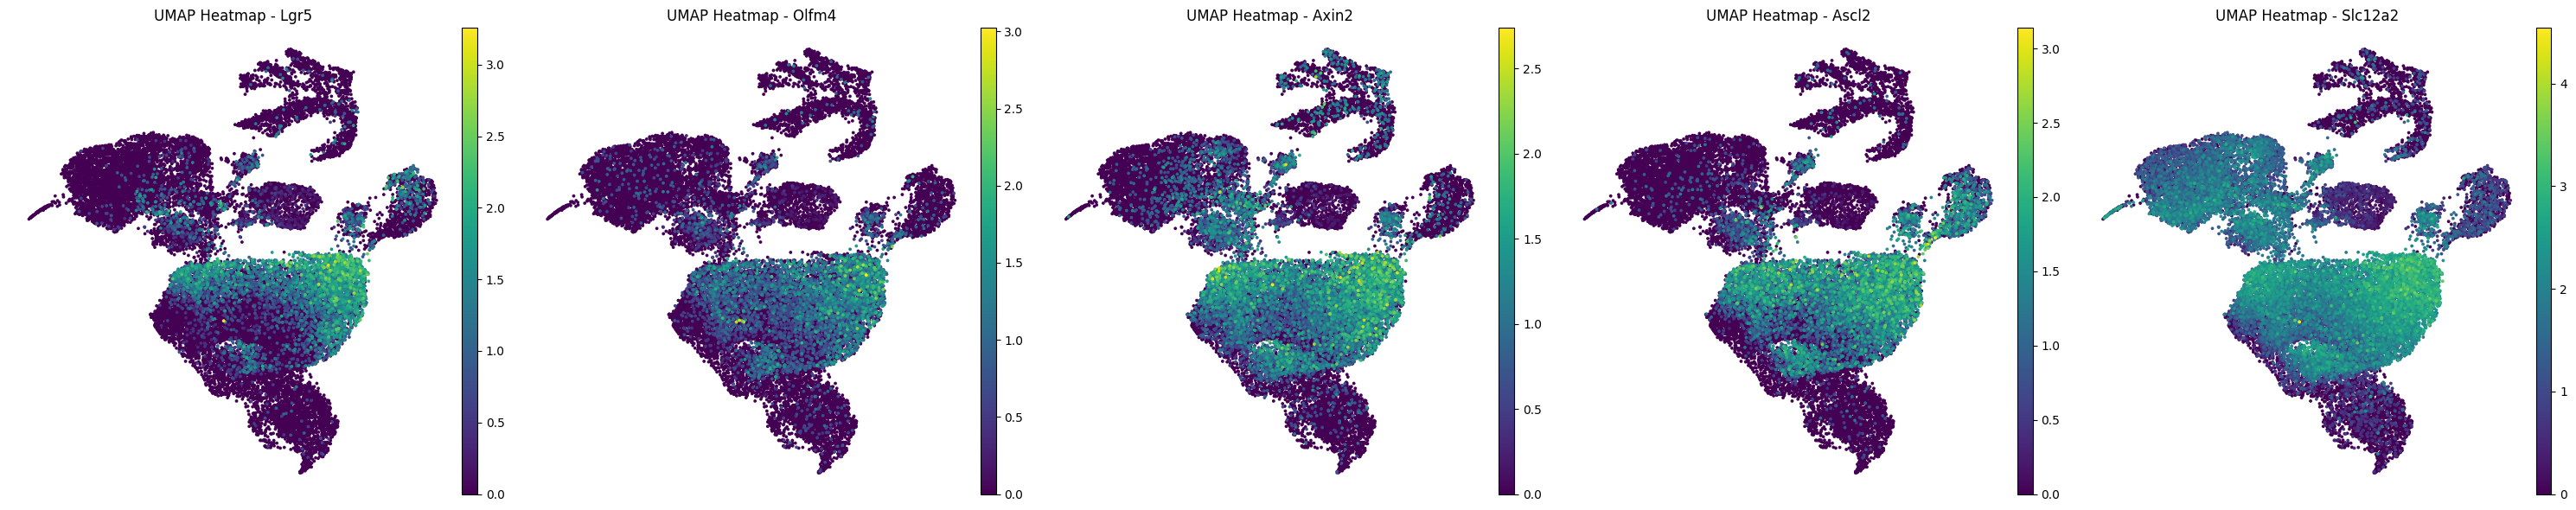

In [10]:
plot_gene_heatmap_umap(adata, marker_dict['ISC'])

## Enterocyte

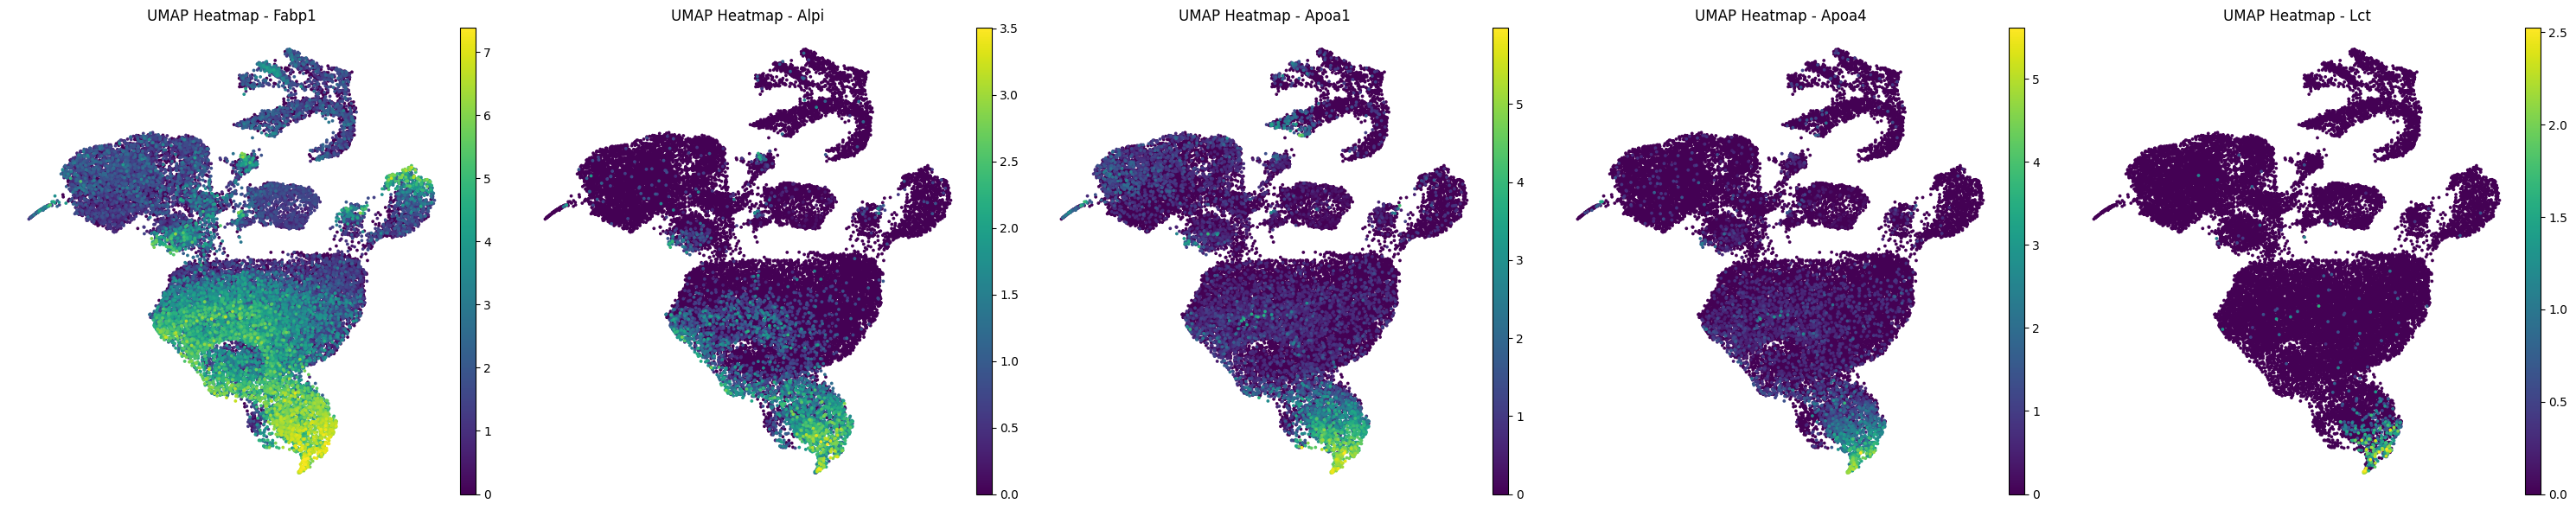

In [11]:
plot_gene_heatmap_umap(adata, marker_dict['Enterocyte'])

## Goblet

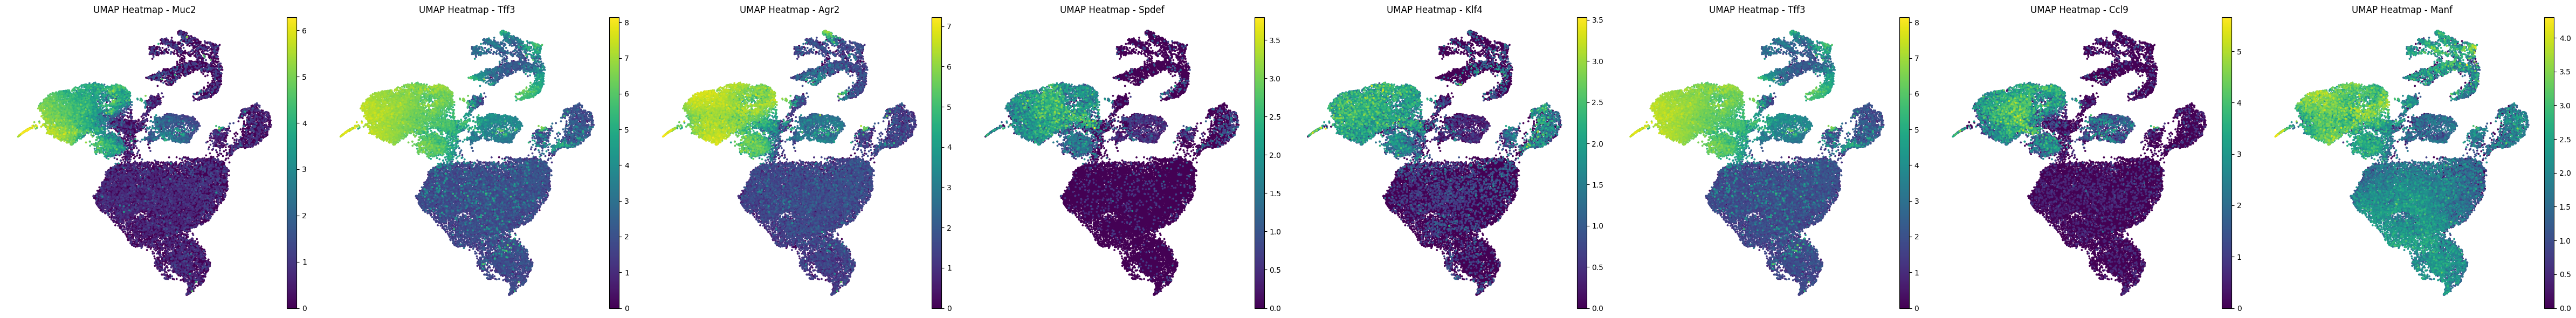

In [12]:
plot_gene_heatmap_umap(adata, marker_dict['Goblet'])

## Tuft

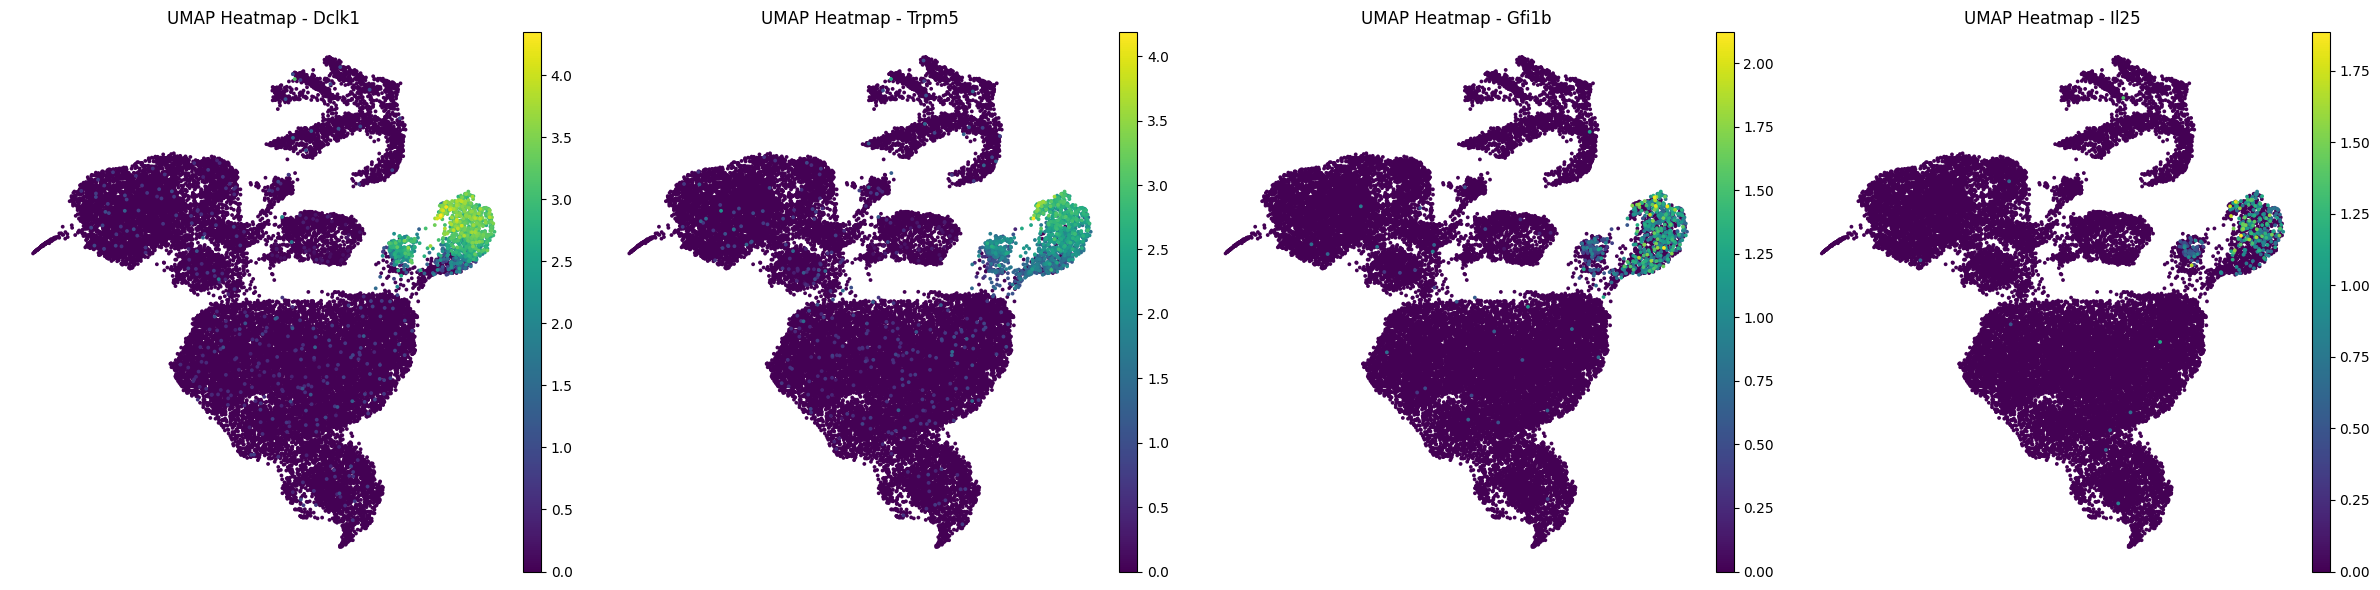

In [13]:
plot_gene_heatmap_umap(adata, marker_dict['Tuft'])

## EEC

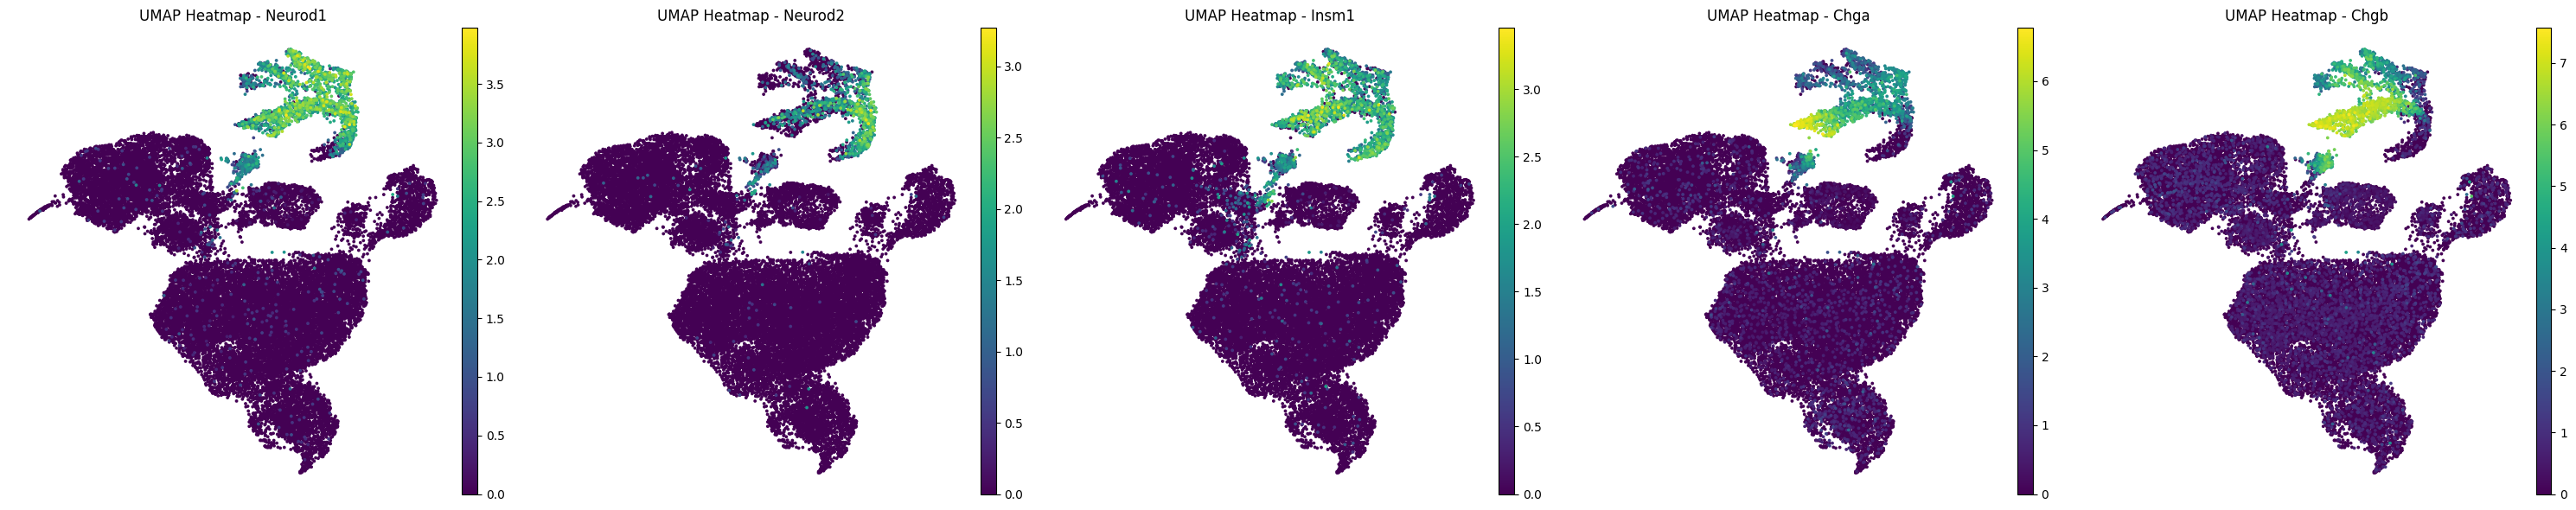

In [14]:
plot_gene_heatmap_umap(adata, marker_dict['EEC'])

## Paneth

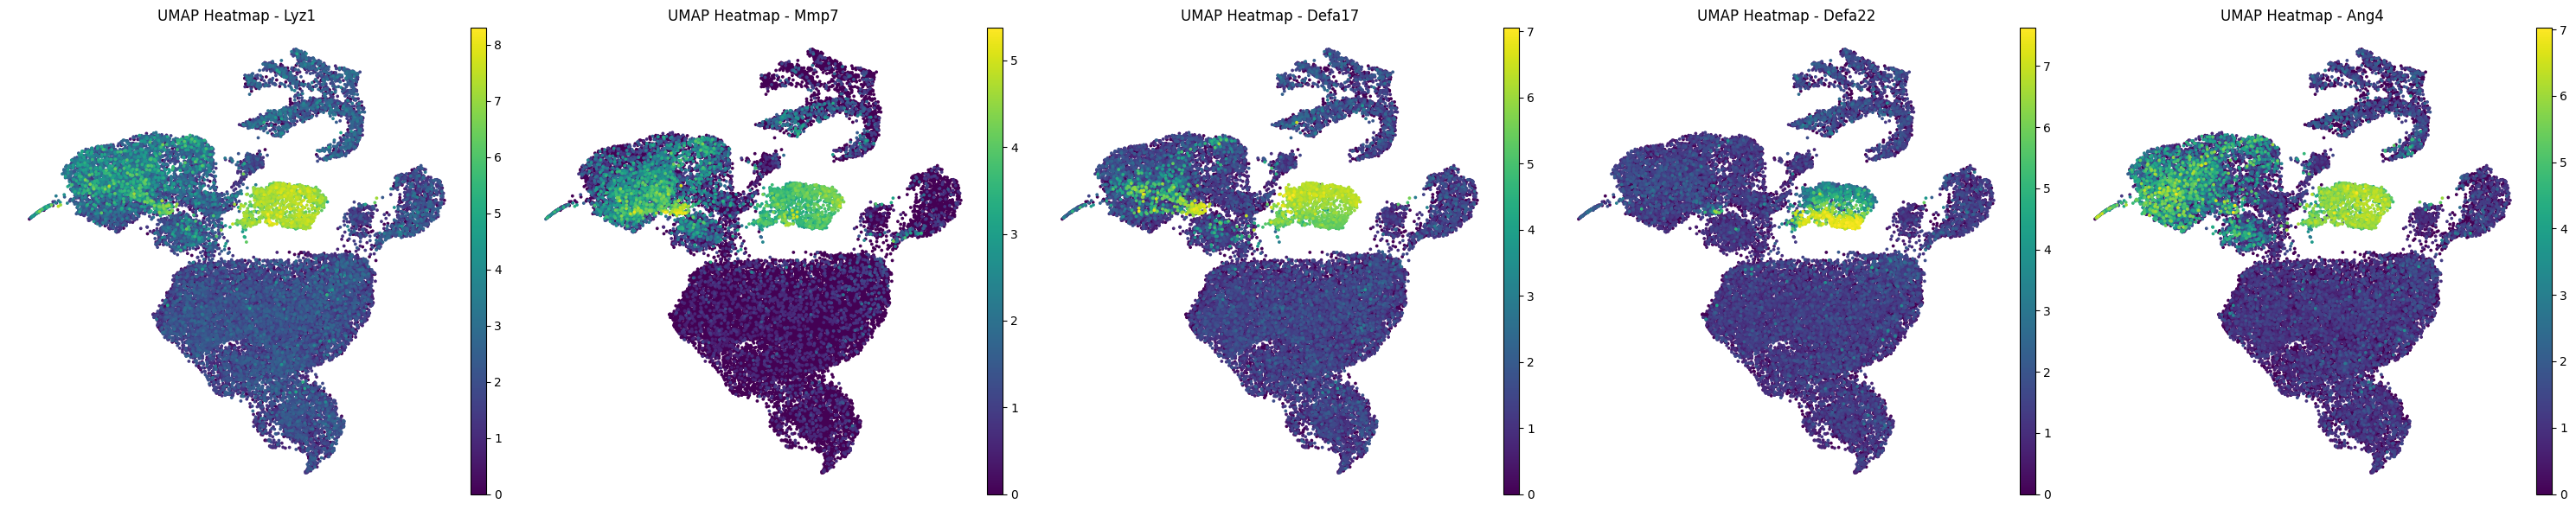

In [8]:
plot_gene_heatmap_umap(adata, marker_dict['Paneth'])

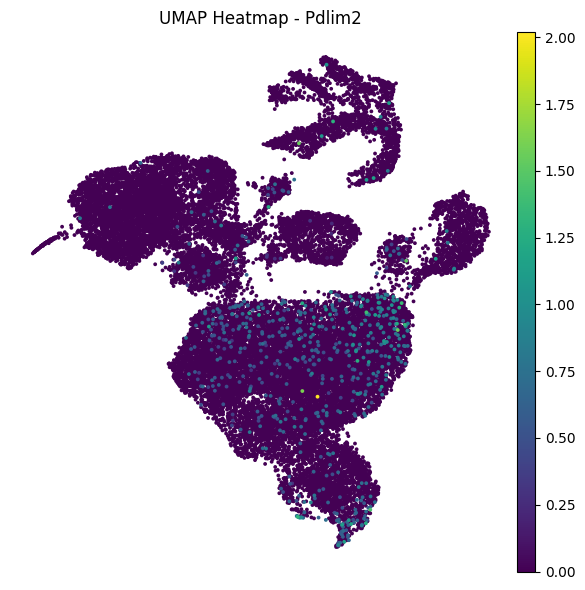

In [16]:
plot_gene_heatmap_umap(adata, ['Pdlim2'])

<Axes: title={'center': 'total counts'}, xlabel='UMAP1', ylabel='UMAP2'>

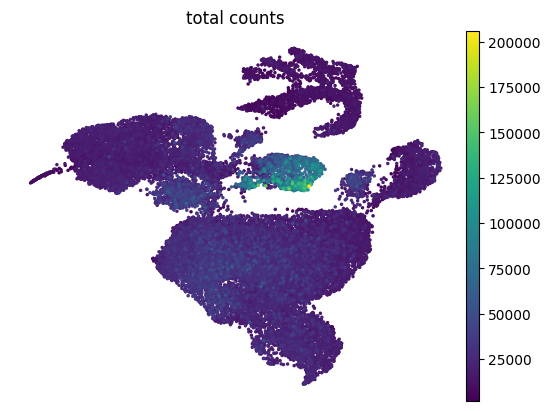

In [22]:
sc.pl.umap(
    adata,
    color='total_counts',
    title='total counts',
    frameon=False,
    color_map='viridis',
    show=False,
    size = 25
)

In [23]:
s_genes = [x.strip() for x in open('/home/glennrdx/Documents/Research_Project/scRNAseq-MSc-Analysis/upstream_analysis/s_genes_mouse.txt')]
g2m_genes = [x.strip() for x in open('/home/glennrdx/Documents/Research_Project/scRNAseq-MSc-Analysis/upstream_analysis/g2m_genes_mouse.txt')]
cell_cycle_genes = s_genes + g2m_genes

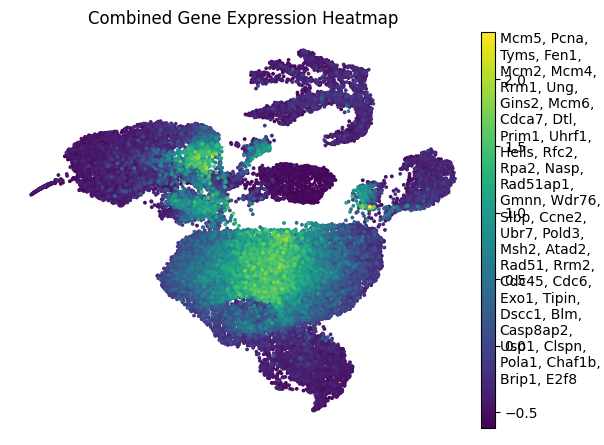

In [24]:
plot_combined_gene_heatmap_umap(adata, s_genes)

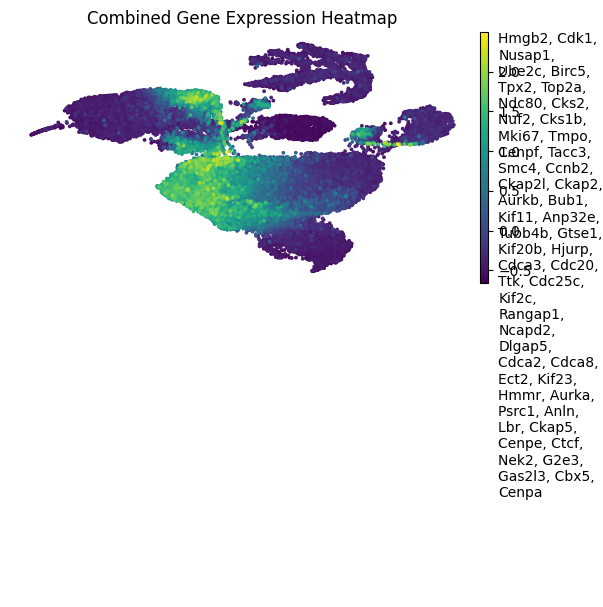

In [25]:
plot_combined_gene_heatmap_umap(adata, g2m_genes)

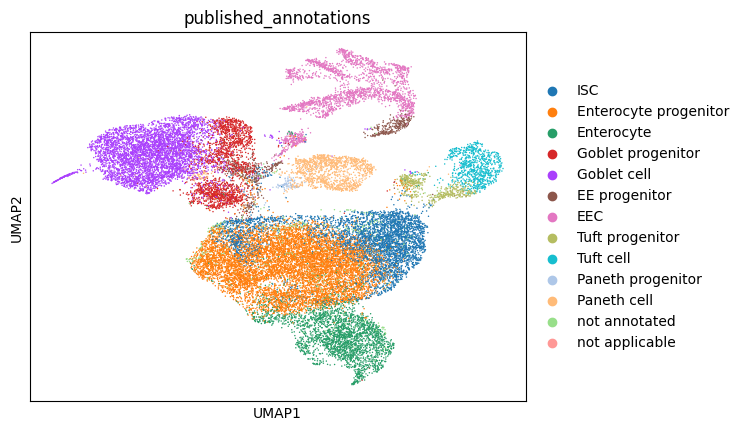

In [30]:
sc.pl.umap(adata, color=['published_annotations'])

In [31]:
sc.tl.rank_genes_groups(adata, 'published_annotations', method='t-test_overestim_var')

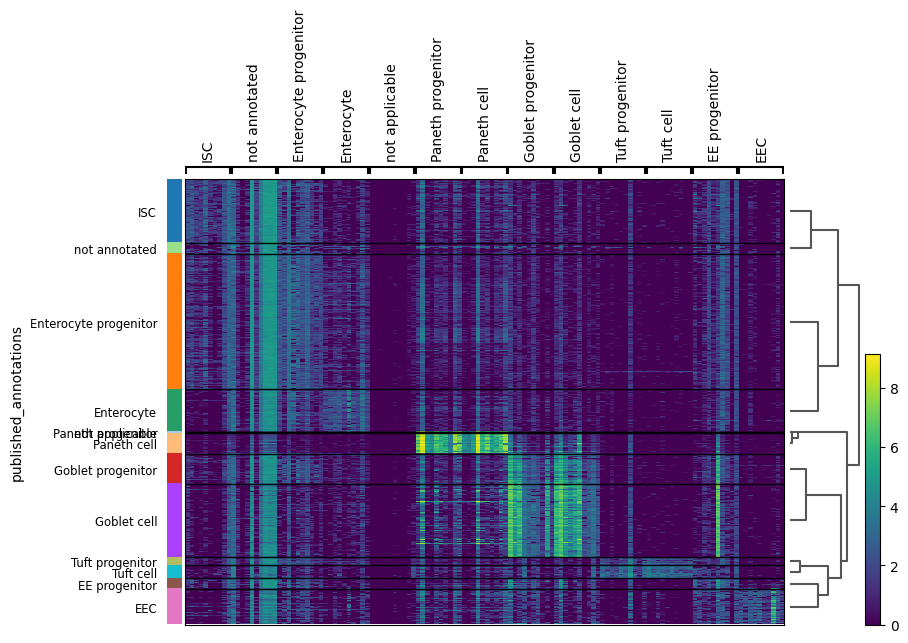

In [32]:
sc.pl.rank_genes_groups_heatmap(adata)